In [1]:
import random
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact, FloatSlider
import itertools as iter
import math

<span><strong style="color: red">IMPORTANT!</strong> If you're reading this on a phone, keep in mind that cells with Python code cannot be resized. If any cell is too large and has hidden text/code, rotate your phone sideways. </span>

<div style="text-align: center; font-size: 50px;"><strong>Simple Neural Network</strong></div>
<p style="text-align: center;">(Programmatically)</p>

</br>

#### 1. What is a Neural Network:
- A neural network is a machine learning program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions.
Every neural network consists of layers of nodes, an input layer, one or more hidden layers, and an output layer. Each node/neuron connects to others, and has its own associated weight. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network.

### 2. Neural Network Architecture.
- Bulding a Neural Network requires:
  1. Neurons (Nodes).
  2. Layers.
  3. Weights and Biases.
  4. Activation Function.
  5. Cost/Loss Function.
  6. Optimizer (Algorithm).
  7. Training Data.
  8. Backpropagation Algorithm.
  
- Representation of  Neural Network:

![Alt text](https://miro.medium.com/v2/resize:fit:1400/1*ZXAOUqmlyECgfVa81Sr6Ew.png)

- Representation of a single neuron with its weights and bias:

![Alt text](https://www.oliviergibaru.org/courses/img/neuron.png)


#### 3. Creating Neural Network with one neuron.
 1. The simplest neural network consists of one neuron (no hidden layers/unbias) that takes inputs and produce outputs. This type of  N.N. can learn only linear function, so in this example we can see a Linear Regression, where for each X value, the Y value is doubled.

$$ a = 2 $$
$$ f(x) = ax $$
$$ y = f(x) $$

2. Preparing random inputs and targets for training, initializing the weight, learning rate and epochs as well the prediction/feed forward function.

In [ ]:
inputs = random.sample(range(0, 10), 10)
targets = [i * 2 for i in inputs]

weight = 0.1

def predict(i):
  return weight * i

3. We make a prediction for all the training inputs.

In [3]:
def data_prediction(inputs):
  pred = [predict(i) for i in inputs]
  return pred

4. The network needs a way to express how accurate the predictions are. Each target value can be compared with a prediction. The difference between the two is called error of a single training sample.

5. Then we calculate the average over all the errors, that is called "cost". Cost function quantifies the error between predicted and expected values and present that error in the form of a single real number. The cost basically tells us how good the network is learning and point is to bring the cost as low as possible.
 - the cost function for this example is called Mean Absolute Error (MAE).
 $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| $$

In [4]:
def calculate_cost(predictions, targets):
  errors = [abs(t - p) for p, t in zip(predictions, targets)]
  cost = sum(errors) / len(targets)
  return cost

6. We need to train our N.N. and update the weight while finding a good balance between the learning rate and epochs. To update the weight we need to calculate the gradient. Updating the weight in the network is called back propagation. Back propagation takes the desired weight changes and propagates it back to the start of the network by adjusting the weight. The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [5]:
epochs = 10
learning_rate = 0.1
for _ in range(epochs):
  predictions = data_prediction(inputs)
  cost = calculate_cost(predictions, targets)
  print(f"Weight: {weight:.2f}, Cost: {cost:.2f}")

  weight += learning_rate * cost

Weight: 0.10, Cost: 8.55
Weight: 0.96, Cost: 4.70
Weight: 1.43, Cost: 2.59
Weight: 1.68, Cost: 1.42
Weight: 1.83, Cost: 0.78
Weight: 1.90, Cost: 0.43
Weight: 1.95, Cost: 0.24
Weight: 1.97, Cost: 0.13
Weight: 1.98, Cost: 0.07
Weight: 1.99, Cost: 0.04


7. Finally we need to test the network with some test data.

In [6]:
#Test data
test_inputs = [5, 6, 8, 15]
test_targets = [10, 12, 16, 30]

The weight was tweaked and the cost was reduce, so now we can test on different data

In [7]:
def network_test(t_inputs, t_targets):
  predictions = data_prediction(test_inputs)
  print("Network testing:")
  for i, t, p in zip(t_inputs, t_targets, predictions):
    print(f"- Input: {i}, Target: {t}, Prediction: {p:.4f}")

# if we want the perfect prediction we need to eather increase epochs or the learning rate.
network_test(test_inputs, test_targets)  

Network testing:
- Input: 5, Target: 10, Prediction: 9.9759
- Input: 6, Target: 12, Prediction: 11.9711
- Input: 8, Target: 16, Prediction: 15.9615
- Input: 15, Target: 30, Prediction: 29.9278


8. Plotting the data after f(x) = ax | a = 2:

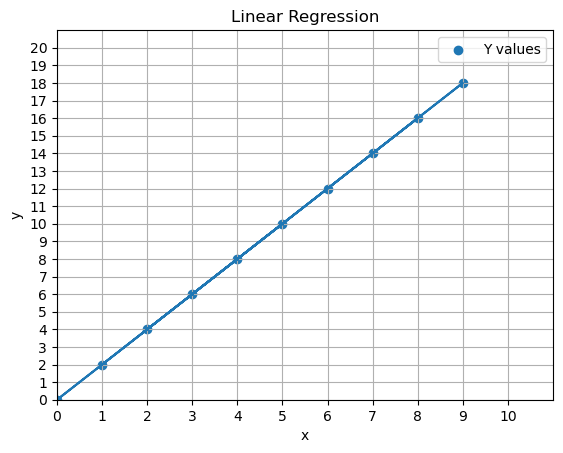

In [8]:
def plot_data(inputs, targets, title):
  plt.scatter(x=inputs,y=targets, label="Y values")
  plt.plot(inputs, targets)
  plt.xlim(left=0, right=11) 
  plt.ylim(bottom=0, top=21)
  plt.xticks(range(0, 11))
  plt.yticks(range(0, 21))
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()
  
plot_data(inputs, targets, "Linear Regression")

#### 4. Creating Neural Network with more than one neurons and a hidden layer.
 1. In order to create more complex N.N. i'm going to add extra input for each neuron in the layers except the input layer. It is called Bias.
  - the bias have several purposes:
    - Offsetting Activation
    - Fine-Tuning
    - Non-linearities
    - Training
    - Generalization

On the diagram below you can play with the Weigths and Bias, so you can see the realation between thse two parameters. Basically the bias helps us moving the intercepting line up and down, while adjusting the Weigths rotate the line.

In [9]:
x = np.linspace(-10, 10, 400)

def plot_line(slope, intercept):
    y = slope * x + intercept
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label=f'y = {slope}x + {intercept}')
    plt.title('Weights and Biases')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.ylim(-20, 20)
    plt.show()

slope_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='Weight:')
intercept_slider = FloatSlider(value=0, min=-10, max=10, step=0.1, description='Bias:')

interact(plot_line, slope=slope_slider, intercept=intercept_slider);

interactive(children=(FloatSlider(value=1.0, description='Weight:', max=5.0, min=-5.0), FloatSlider(value=0.0,…

2. For the next N.N. example i'm going to add additional layer (hidden layer) and all the neuron's biases in the hidden layer and the output layer.
The Neural Network is going to predict the colors of the three types of flowers (**purple**, **orange**, **green**) based on two parameters (leaves length and leaves width).

- Flowers metrics:

| Color  |  Length  | Width |
|----------|:-------------:|------:|
| Purple |min = 2.2, max = 5.3| min = 1.1, max = 2.7|
| Orange |min = 2.9, max = 4.7| min = 2.2, max = 3.2|
| Green |min = 2.7, max = 4.7 | min = 2.5, max = 3.9|

 - generating 60 randomized samples of flowers with values between the metrics above. Purple flowers - 22, Orange - 20, Green - 18 (this can be any number of samples it doesn`t matter).

In [10]:
purple_len_wid = [(round(random.uniform(2.2, 5.3), 1), round(random.uniform(1.1, 2.7), 1)) for _ in range(22)]
orange_len_wid = [(round(random.uniform(2.9, 4.7), 1), round(random.uniform(2.2, 3.2), 1)) for _ in range(20)]
green_len_wid = [(round(random.uniform(2.7, 4.7), 1), round(random.uniform(2.5, 3.9), 1)) for _ in range(18)]

- second step - normalize the data using **Min - Max Normalization** function. This kind of normalization brings all values (lengths and widths) between 0 and 1. Data normalization is crucial for several reasons:
  - Helps in speeding up the training process
  - Preventing gradient explosions and vanishing. If the data is not normalized, features with larger values can dominate the gradient updates, leading to gradient explosion or vanishing issues, making the training process unstable or slow.
  - Better performance
  - Normalization can prevent numerical issues during the training process, especially when using certain activation functions, which are sensitive to the input scale.

$$ Min - Max \ Normalization: \ \ X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

In [11]:
def normalize_data(values):
  min_value = min(values)
  max_value = max(values)
  return [round((value - min_value) / (max_value - min_value), 4) for value in values]

- using the Min - Max Normalization in a data generation algorithm.

In [12]:
def generate_data(purple_f, orange_f, green_f):
  purple_lengths, purple_widths = np.array(purple_f).T.tolist()
  orange_lengths, orange_widths = np.array(orange_f).T.tolist()
  green_lengths, green_widths = np.array(green_f).T.tolist()
  
  lengths = [x for x in iter.chain(purple_lengths, orange_lengths, green_lengths)]
  widths = [x for x in iter.chain(purple_widths, orange_widths, green_widths)]

  normalized_lengths = normalize_data(lengths)
  normalized_widths = normalize_data(widths)
  
  inputs = [(l, w) for l, w in zip(normalized_lengths, normalized_widths)]
  return inputs

- next step, i'm using **One Hot Encoding** to represent each flower as numerical value. This is a technique that is used machine learning models. It allows the use of categorical variables in models that require numerical input. Now each flower has its own unique value. 

In [13]:
purple = (1, 0, 0)
orange = (0, 1, 0)
green = (0, 0, 1)

- generating the inputs and the targets data that the network needs, also setting extra parameters that are required for network training:
  - Epochs - iterations of the repeated learning process
  - Learning rate - optimizing parameter
  - Numbers of neuros in each layer
  - Weigth for every layer connection (randomly generated)
  - Biases for hidden and output layer (randomly generated)

In [14]:
inputs = generate_data(purple_len_wid, orange_len_wid, green_len_wid)
targets = list(iter.chain(iter.repeat(purple, 22), iter.repeat(orange, 20), iter.repeat(green, 18)))
epochs = 50
learning_rate = .5
input_count, hidden_count, output_count = 2, 8, 3

# weigths from input layer -> hidden layer
w_i_h = [
  [-0.3048125205764348, -0.3689319192497319], 
  [0.4495600133459031, -0.27570318775208824], 
  [0.4463320581484289, 0.2273667575262014],
  [0.3115580417942929, 0.20700068760044343], 
  [0.005618605163025925, 0.25905500275208737],
  [-0.2620091308462177, 0.001190291388012299], 
  [-0.3937871564118448, 0.34041671819433694], 
  [-0.2906056208227794, 0.15050950518792472]
 ]

# weigths from hidden layer -> output layer
w_h_o = [
  [-0.20325529148010302, 0.1054818799653302, 0.172861408053662, 0.11426945675276956, 0.17628644562056095, -0.05442237827544405, -0.15846038978191712, -0.04071805307246845],
  [-0.25173365162011685, -0.34995420182143666, 0.08196136744255156, -0.28541042014953855, -0.3298738233019395, -0.2702855483592922, 0.22042850553155335, -0.26982553876537296], 
  [-0.30561417787349143, 0.27252515267726307, 0.2457533972946353, -0.29798196965417023, -0.33769371252973834, 0.13595267045658266, -0.11101899667709614, 0.3436868045292677]
]

# biases for the hidden layer
b_i_h = [0.6063464597215029, 0.5589871196592605, 0.6874307812702185, 0.2125663677902685, 0.17106157055648363, 0.2902662662666464, 0.09678661783963749, 0.5872321338016152]

# biases for the output layer
b_h_o = [0.603809731255821, 0.9614383956023609, 0.7564420346500402]

 - it's time to create the learning algorithm.
    - First i'm calculating the weigthed sum of all the weigths from the input neurons to each neuron in the hidden layer. According to the **weigthed sum** formula:
    $$ z = \sum_{i=1}^{n} w_{i} x_i + b $$

    $$ or \ more \ visual \ representation $$ 
    $$ z = Wx + b = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23}  \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} $$

    - using activation function, called **ReLU (Rectified Linear Unit)** to the output of each neuron in the hidden layer. $$\text{ReLU}(z) = \max(0, z)$$ ReLU applies a simple thresholding operation to its input, This means that if $z$ is greater than zero ReLU outputs $z$ itself. If $z$ is less than or equal to zero, ReLU outputs zero. The primary role of ReLU is to introduce non-linearity into the network. Without non-linear activation functions like ReLU, neural networks would behave like a linear model, no matter how many layers they have. Non-linearity allows the network to approximate complex functions and learn intricate patterns in data.
    <br>
    <br>
    - calculating the **weigthed sum** of the activated values from the hidden layer passing them to the output layer.
    - activating the values from each output neurons using **Softmax activation** function. The softmax activation function is primarily used in the output layer of a neural network for multi-class classification tasks. **It turns a vector of K real values into a vector of K real values that sum to 1.** The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.
    $$ Softmax \ \   p_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}, \quad \text{for } i = 1, 2, \ldots, K$$
    - starting the backpropagation
    - calculating the cost/loss using **Log Loss** function. It is a logarithmic transformation of the likelihood function, primarily used to evaluate the performance of probabilistic classifiers. Log Loss takes into account the uncertainty of predictions by penalizing models more heavily for confidently incorrect predictions.
    $$ \text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$
    - calculcating the error derivative of the output layer using the **Log Loss** function derivative formula.
   $$ \frac{\partial \text{Log Loss}}{\partial \hat{y}_i} = -\frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right) $$
    - calculating the error derivative of the hidden layer outputs using **ReLU** function derivative.
    $$\text{ReLU}'(z) = \begin{cases} 1, & \text{if } z > 0 \\ 0, & \text{if } z \leq 0 \end{cases} $$
    - calculating the gradient of hidden layer to output layer.
    - calculating the gradient of input layer to hidden layer.
    - finally updating the weigths and biases for all layers in the network

In [15]:
def softmax(predictions):
  m = max(predictions)
  temp = [math.exp(p - m) for p in predictions]
  total = sum(temp)
  return [t / total for t in temp]

def log_loss(activations, targets):
  act = np.clip(activations, 1e-15, 1 - 1e-15)
  losses = [-t * math.log(a) - (1 - t) * math.log(1 - a) for a, t in zip(act, targets)]
  return sum(losses)

def network_training(inputs, targets, epochs, learning_rate, input_count, hidden_count, output_count, w_i_h, w_h_o, b_i_h, b_h_o):
  for epoch in range(epochs):
    # weigthed sum input layer -> hidden layer
    pred_h = [[sum([w * a for w, a in zip(weights, inp)]) + bias for weights, bias in zip(w_i_h, b_i_h)] for inp in inputs]
  
    #apply ReLU activation
    act_h = [[max(0, p) for p in pred] for pred in pred_h]
  
    # weigthed sum hidden layer -> output layer
    pred_o = [[sum([w * a for w, a in zip(weights, inp)]) + bias for weights, bias in zip(w_h_o, b_h_o)] for inp in act_h]
  
    # softmax activation
    act_o = [softmax(p) for p in pred_o]
  
    # cost/loss calculation
    cost = sum([log_loss(a, t) for a, t in zip(act_o, targets)]) / len(act_o)
    print(f"Epoch: {epoch} cost: {cost:.4f}")
  
    # calculating Log Loss derivative of the output layer
    errors_d_o = [[a - t for a, t in zip(ac, ta)] for ac, ta in zip(act_o, targets)]
  
    # calculating ReLU derivative of the hidden layer
    w_h_o_T = list(zip(*w_h_o))
    errors_d_h = [[sum([d * w for d, w in zip(deltas, weights)]) * (0 if p <= 0 else 1) for weights, p in zip(w_h_o_T, pred)] for deltas, pred in zip(errors_d_o, pred_h)]
  
    # Gradient hidden->output
    act_h_T = list(zip(*act_h))
    errors_d_o_T = list(zip(*errors_d_o))
    w_h_o_d = [[sum([d * a for d, a in zip(deltas, act)]) for deltas in errors_d_o_T] for act in act_h_T] # contains the deltas for the weights from hidden to output
    b_h_o_d = [sum([d for d in deltas]) for deltas in errors_d_o_T] # contains the deltas for the output layer biases
  
    # Gradient input->hidden
    inputs_T = list(zip(*inputs))
    errors_d_h_T = list(zip(*errors_d_h))
    w_i_h_d = [[sum([d * a for d, a in zip(deltas, act)]) for deltas in errors_d_h_T] for act in inputs_T]
    b_i_h_d = [sum([d for d in deltas]) for deltas in errors_d_h_T]
  
    # Upgrade weights and biases for all layers
    w_h_o_d_T = list(zip(*w_h_o_d))
    for y in range(output_count):
      for x in range(hidden_count):
        w_h_o[y][x] -= learning_rate * w_h_o_d_T[y][x] / len(inputs)
      b_h_o[y] -= learning_rate * b_h_o_d[y] / len(inputs)

    w_i_h_d_T = list(zip(*w_i_h_d))
    for y in range(hidden_count):
      for x in range(input_count):
        w_i_h[y][x] -= learning_rate * w_i_h_d_T[y][x] / len(inputs)
      b_i_h[y] -= learning_rate * b_i_h_d[y] / len(inputs) 
  return w_i_h, w_h_o, b_i_h, b_h_o

w_i_h, w_h_o, b_i_h, b_h_o = network_training(inputs, targets, epochs, learning_rate, input_count, hidden_count, output_count, w_i_h, w_h_o, b_i_h, b_h_o)

Epoch: 0 cost: 1.9888
Epoch: 1 cost: 1.9179
Epoch: 2 cost: 1.8999
Epoch: 3 cost: 1.8905
Epoch: 4 cost: 1.8824
Epoch: 5 cost: 1.8746
Epoch: 6 cost: 1.8667
Epoch: 7 cost: 1.8587
Epoch: 8 cost: 1.8503
Epoch: 9 cost: 1.8418
Epoch: 10 cost: 1.8329
Epoch: 11 cost: 1.8237
Epoch: 12 cost: 1.8141
Epoch: 13 cost: 1.8040
Epoch: 14 cost: 1.7936
Epoch: 15 cost: 1.7827
Epoch: 16 cost: 1.7715
Epoch: 17 cost: 1.7598
Epoch: 18 cost: 1.7477
Epoch: 19 cost: 1.7351
Epoch: 20 cost: 1.7222
Epoch: 21 cost: 1.7090
Epoch: 22 cost: 1.6955
Epoch: 23 cost: 1.6817
Epoch: 24 cost: 1.6677
Epoch: 25 cost: 1.6537
Epoch: 26 cost: 1.6395
Epoch: 27 cost: 1.6255
Epoch: 28 cost: 1.6113
Epoch: 29 cost: 1.5973
Epoch: 30 cost: 1.5835
Epoch: 31 cost: 1.5698
Epoch: 32 cost: 1.5563
Epoch: 33 cost: 1.5432
Epoch: 34 cost: 1.5303
Epoch: 35 cost: 1.5176
Epoch: 36 cost: 1.5055
Epoch: 37 cost: 1.4935
Epoch: 38 cost: 1.4819
Epoch: 39 cost: 1.4708
Epoch: 40 cost: 1.4599
Epoch: 41 cost: 1.4495
Epoch: 42 cost: 1.4393
Epoch: 43 cost: 1.429

 3. Lastly, testing how well the network learns.
  - creating test data.

In [16]:
test_purple_len_wid = [(round(random.uniform(2.2, 5.3), 1), round(random.uniform(1.1, 2.7), 1)) for _ in range(10)]
test_orange_len_wid = [(round(random.uniform(2.9, 4.7), 1), round(random.uniform(2.2, 3.2), 1)) for _ in range(10)]
test_green_len_wid = [(round(random.uniform(2.7, 4.7), 1), round(random.uniform(2.5, 3.9), 1)) for _ in range(10)]

test_inputs = generate_data(test_purple_len_wid, test_orange_len_wid, test_green_len_wid)
test_targets = list(iter.chain(iter.repeat(purple, 10), iter.repeat(orange, 10), iter.repeat(green, 10)))

- creating the test algorithm.

In [17]:
def network_testing(t_inputs, t_targets, w_i_h, w_h_o, b_i_h, b_h_o):

  pred_h = [[sum([w * a for w, a in zip(weights, inp)]) + bias for weights, bias in zip(w_i_h, b_i_h)] for inp in t_inputs]
  act_h = [[max(0, p) for p in pre] for pre in pred_h]
  pred_o = [[sum([w * a for w, a in zip(weights, inp)]) + bias for weights, bias in zip(w_h_o, b_h_o)] for inp in act_h]
  act_o = [softmax(p) for p in pred_o]
  correct = 0

  for a, t in zip(act_o, t_targets):
    if a.index(max(a)) == t.index(max(t)):
      correct += 1
  print(f"Correct: {correct}/{len(act_o)} ({correct / len(act_o):%})")
  
network_testing(test_inputs, test_targets, w_i_h, w_h_o, b_i_h, b_h_o)

Correct: 18/30 (60.000000%)


 - The predictions success vary between **40-80%**, this is because the data (leaves length and leaves width) is randomized, and that makes it chaotic. This indicates that there is no clear relationship between the variables, or that the data has high variance, making it difficult to identify any meaningful pattern. We can see from the table metrics, that we can have Orange flower with $ length = 3, width = 3$, also Green flower with the same values for length and width. In that case, the network has hard times predicting this outputs. In order to fix this we need to optimize the network. Adding additional hidden layer can help, adjusting some learning parameters also another parameters for distinction between the flowers.
 - Visualizing the data of non-linear model.

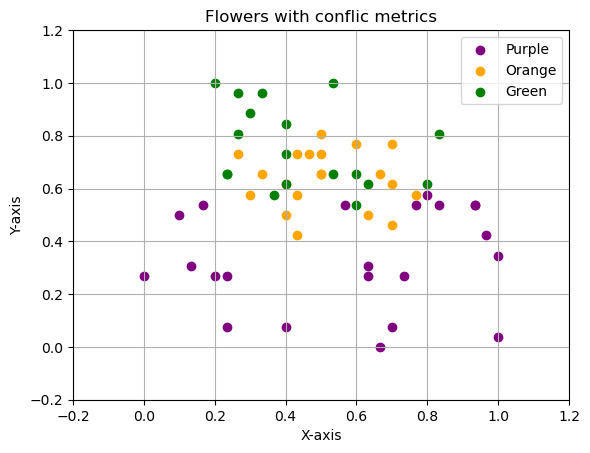

In [18]:
def plot_inputs(inputs, targets, title):
  data = list(zip(inputs, targets))
  
  purple_arr = []
  orange_arr = []
  green_arr = []
  
  for i in range(len(data)):
    if data[i][1] == (1, 0, 0):
      purple_arr.append(data[i][0])
    elif data[i][1] == (0, 1, 0):
      orange_arr.append(data[i][0])
    else:
      green_arr.append(data[i][0])
  
  purple_x, purple_y = zip(*purple_arr)
  orange_x, orange_y = zip(*orange_arr)
  green_x, green_y = zip(*green_arr)

  # Plotting the data
  plt.scatter(purple_x, purple_y, color = "purple", label="Purple")
  plt.scatter(orange_x, orange_y, color = "orange", label="Orange")
  plt.scatter(green_x, green_y, color = "green", label="Green")
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title(title)
  plt.xlim(-0.2, 1.2)
  plt.ylim(-0.2, 1.2)
  plt.grid(True)
  plt.legend()
  plt.show()

plot_inputs(inputs, targets, 'Flowers with conflic metrics')

 - For the last example, i'm going to train the network with non conflict metrics and see the results. 
    - changing the metrics for the flowers in a way that, two flowers can't be similar:
  
  | Color  |  Length  | Width |
|----------|:-------------:|------:|
| Purple |min = 1.2, max = 2.7| min = 1, max = 2.3|
| Orange |min = 1.9, max = 2.9| min = 2.8, max = 4.2|
| Green |min = 3.5, max = 4.8 | min = 2.1, max = 3.2|

In [19]:
# USING THE SAME VALUES FOR WEIGTHS AND BIASES BEFORE THE APPLIED CHANGES FROM THE 1-ST MODEL TRAINING
w_i_h = [
  [-0.3048125205764348, -0.3689319192497319], 
  [0.4495600133459031, -0.27570318775208824], 
  [0.4463320581484289, 0.2273667575262014],
  [0.3115580417942929, 0.20700068760044343], 
  [0.005618605163025925, 0.25905500275208737],
  [-0.2620091308462177, 0.001190291388012299], 
  [-0.3937871564118448, 0.34041671819433694], 
  [-0.2906056208227794, 0.15050950518792472]
 ]

w_h_o = [
  [-0.20325529148010302, 0.1054818799653302, 0.172861408053662, 0.11426945675276956, 0.17628644562056095, -0.05442237827544405, -0.15846038978191712, -0.04071805307246845],
  [-0.25173365162011685, -0.34995420182143666, 0.08196136744255156, -0.28541042014953855, -0.3298738233019395, -0.2702855483592922, 0.22042850553155335, -0.26982553876537296], 
  [-0.30561417787349143, 0.27252515267726307, 0.2457533972946353, -0.29798196965417023, -0.33769371252973834, 0.13595267045658266, -0.11101899667709614, 0.3436868045292677]
]

b_i_h = [0.6063464597215029, 0.5589871196592605, 0.6874307812702185, 0.2125663677902685, 0.17106157055648363, 0.2902662662666464, 0.09678661783963749, 0.5872321338016152]

b_h_o = [0.603809731255821, 0.9614383956023609, 0.7564420346500402]

In [20]:
# new data for the classification model
linear_purple_len_wid = [(round(random.uniform(1.2, 2.7), 1), round(random.uniform(1, 2.3), 1)) for _ in range(12)]
linear_orange_len_wid = [(round(random.uniform(1.9, 2.9), 1), round(random.uniform(2.8, 4.2), 1)) for _ in range(18)]
linear_green_len_wid = [(round(random.uniform(3.5, 4.8), 1), round(random.uniform(2.1, 3.2), 1)) for _ in range(20)]

linear_inputs = generate_data(linear_purple_len_wid, linear_orange_len_wid, linear_green_len_wid)
linear_targets = list(iter.chain(iter.repeat(purple, 12), iter.repeat(orange, 18), iter.repeat(green, 20)))

# training the classification model
w_i_h, w_h_o, b_i_h, b_h_o = network_training(linear_inputs, linear_targets, epochs, learning_rate, input_count, hidden_count, output_count, w_i_h, w_h_o, b_i_h, b_h_o)

Epoch: 0 cost: 1.9705
Epoch: 1 cost: 1.8558
Epoch: 2 cost: 1.8069
Epoch: 3 cost: 1.7719
Epoch: 4 cost: 1.7396
Epoch: 5 cost: 1.7076
Epoch: 6 cost: 1.6749
Epoch: 7 cost: 1.6411
Epoch: 8 cost: 1.6061
Epoch: 9 cost: 1.5697
Epoch: 10 cost: 1.5319
Epoch: 11 cost: 1.4929
Epoch: 12 cost: 1.4530
Epoch: 13 cost: 1.4123
Epoch: 14 cost: 1.3706
Epoch: 15 cost: 1.3287
Epoch: 16 cost: 1.2863
Epoch: 17 cost: 1.2440
Epoch: 18 cost: 1.2018
Epoch: 19 cost: 1.1604
Epoch: 20 cost: 1.1195
Epoch: 21 cost: 1.0796
Epoch: 22 cost: 1.0409
Epoch: 23 cost: 1.0031
Epoch: 24 cost: 0.9669
Epoch: 25 cost: 0.9317
Epoch: 26 cost: 0.8974
Epoch: 27 cost: 0.8644
Epoch: 28 cost: 0.8323
Epoch: 29 cost: 0.8014
Epoch: 30 cost: 0.7717
Epoch: 31 cost: 0.7429
Epoch: 32 cost: 0.7153
Epoch: 33 cost: 0.6887
Epoch: 34 cost: 0.6632
Epoch: 35 cost: 0.6387
Epoch: 36 cost: 0.6153
Epoch: 37 cost: 0.5928
Epoch: 38 cost: 0.5714
Epoch: 39 cost: 0.5509
Epoch: 40 cost: 0.5314
Epoch: 41 cost: 0.5128
Epoch: 42 cost: 0.4950
Epoch: 43 cost: 0.478

- Testing the linear model

In [21]:
linear_test_purple_len_wid = [(round(random.uniform(1.2, 2.7), 1), round(random.uniform(1, 2.3), 1)) for _ in range(20)]
linear_test_orange_len_wid = [(round(random.uniform(1.9, 2.9), 1), round(random.uniform(2.8, 4.2), 1)) for _ in range(20)]
linear_test_green_len_wid = [(round(random.uniform(3.5, 4.8), 1), round(random.uniform(2.1, 3.2), 1)) for _ in range(20)]

linear_test_inputs = generate_data(linear_test_purple_len_wid, linear_test_orange_len_wid, linear_test_green_len_wid)
linear_test_targets = list(iter.chain(iter.repeat(purple, 20), iter.repeat(orange, 20), iter.repeat(green, 20)))

network_testing(linear_test_inputs, linear_test_targets, w_i_h, w_h_o, b_i_h, b_h_o)

Correct: 58/60 (96.666667%)


- Visualizing the data.

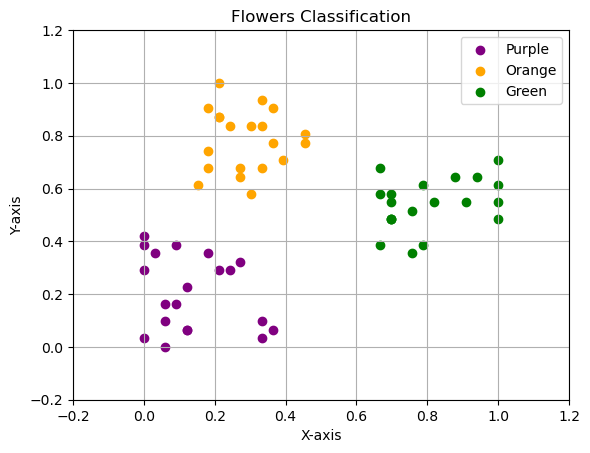

In [22]:
plot_inputs(linear_test_inputs, linear_test_targets, "Flowers Classification")